In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import style
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import warnings
from word2number import w2n 
from sklearn.preprocessing import PolynomialFeatures

In [76]:
df = pd.read_csv("Assets/Height_Weight_Dataset.csv")
df

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [77]:
X = df.iloc[:,0].values

In [78]:
X

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80], dtype=int64)

In [79]:
X.shape #need to convert to 2d array before passing it to model

(71,)

In [6]:
X= X.reshape(-1,1)

In [7]:
X.shape

(71, 1)

In [8]:
y = df.iloc[:,-1]

In [9]:
y

0     138
1     138
2     138
3     139
4     139
     ... 
66    204
67    205
68    206
69    207
70    208
Name: Height, Length: 71, dtype: int64

In [10]:
y.shape

(71,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
pred = lr.predict(X_test)

In [15]:
r2_score(y_test, pred) 
#See accuracy is little less let's see if this data is linear or non-linear by ploting

0.8547153936823447

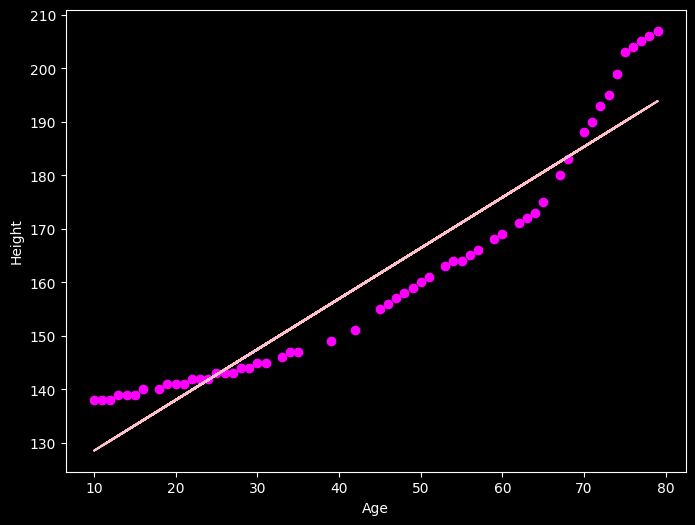

In [16]:
style.use('dark_background')
plt.figure(figsize=(8, 6)) 
plt.scatter(X_train,y_train, color = 'magenta', label = 'Data Points')
plt.plot(X_train,lr.predict(X_train), color = 'pink',label = 'Regression Line')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# See accuracy is less because it is a Non/Polynomial-linear Regression case

In [17]:
plt.style.available #you can check available styles for you graph


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

### Let's fit it with Polynomial Regression Model

In [37]:
for i in range(1,6):
    poly_r = PolynomialFeatures(degree = i)
    X_poly = poly_r.fit_transform(X_train)

    p_lr = LinearRegression()
    p_lr.fit(X_poly,y_train)
    pred = p_lr.predict(X_poly)
    print("Degree: %d"%i)
    print('Possible Score:', r2_score(y_train,pred))
    

Degree: 1
Possible Score: 0.9033447034302388
Degree: 2
Possible Score: 0.9901231556472626
Degree: 3
Possible Score: 0.9958571459932453
Degree: 4
Possible Score: 0.9964027611527302
Degree: 5
Possible Score: 0.9964206899622003


In [65]:
poly_r = PolynomialFeatures(degree = 3)
X_poly = poly_r.fit_transform(X_train)
X_poly

array([[1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 7.90000e+01, 6.24100e+03, 4.93039e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05],
       [1.00000e+00, 5.30000e+01, 2.80900e+03, 1.48877e+05],
       [1.00000e+00, 1.40000e+01, 1.96000e+02, 2.74400e+03],
       [1.00000e+00, 7.50000e+01, 5.62500e+03, 4.21875e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05],
       [1.00000e+00, 2.10000e+01, 4.41000e+02, 9.26100e+03],
       [1.00000e+00, 1.30000e+01, 1.69000e+02, 2.19700e+03],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 5.50000e+01, 3.02500e+03, 1.66375e+05],
       [1.00000e+00, 2.00000e+01, 4.00000e+02, 8.00000e+03],
       [1.00000e+00, 5.10000e+01, 2.60100e+03, 1.32651e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.3

In [66]:
p_lr = LinearRegression()

In [67]:
p_lr.fit(X_poly,y_train)

LinearRegression()

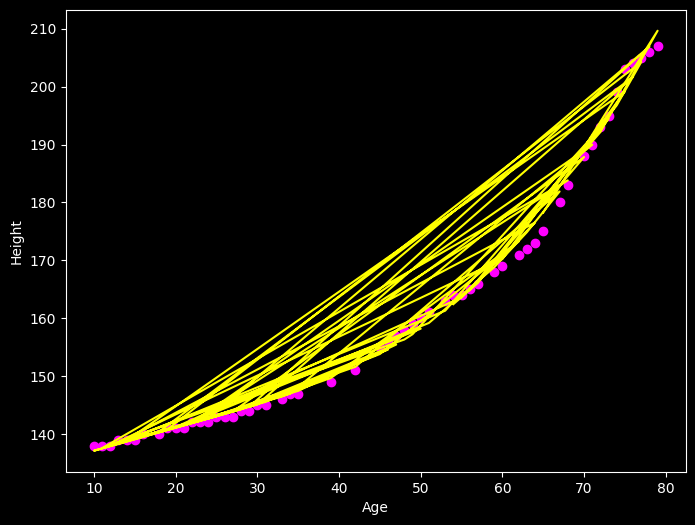

In [68]:
style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.scatter(X_train,y_train, color = 'magenta', label = 'Data Points')
plt.plot(X_train,p_lr.predict(poly_r.fit_transform(X_train)), color = 'yellow',label = 'Regression Line')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

In [69]:
pred2 = p_lr.predict(poly_r.fit_transform(X_test))

In [70]:
r2_score(y_test, pred2)

0.9931220336531285

# Accuracy improved with polynomial model using degree concept.

In [72]:
lr.predict([[53]])

array([169.23350339])

In [73]:
p_lr.predict(poly_r.fit_transform([[53]]))

array([161.30760024])